In [11]:
import numpy as np
import pandas as pd
import os

In [2]:
os.chdir("C:\\Users\\Jayrajsinh\\Desktop\\Spam_detection")

In [11]:
df = pd.read_csv("spam.csv", encoding=('ISO-8859-1') )

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3823,ham,I miss you so much I'm so desparate I have rec...,NaN,NaN,NaN
875,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",NaN,NaN,NaN
2809,ham,Mm so you asked me not to call radio,NaN,NaN,NaN
4716,ham,"K will do, addie &amp; I are doing some art so...",NaN,NaN,NaN
1363,ham,"Yetunde, i'm sorry but moji and i seem too bus...",NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
# drop Last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2
4850,ham,Gain the rights of a wife.dont demand it.i am ...
4577,spam,Urgent! call 09066350750 from your landline. Y...
325,ham,No calls..messages..missed calls
963,ham,Yo chad which gymnastics class do you wanna ta...
5105,ham,I wnt to buy a BMW car urgently..its vry urgen...


In [20]:
# Renaming colos
df.rename(columns={'v1' :'target','v2' :'text'},inplace=True)
df.sample(5)

,target,text
3357,ham,I don't run away frm u... I walk slowly &amp; ...
5208,ham,Hi.what you think about match?
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...
1424,ham,Yes.. now only saw your message..
4041,ham,What time do u get out?


In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
df['target'] = encoder.fit_transform(df['target'])

NameError: name 'df' is not defined

In [6]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
# check for duplicate values
df.duplicated().sum()

403

In [27]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

# 2.EDA

In [29]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

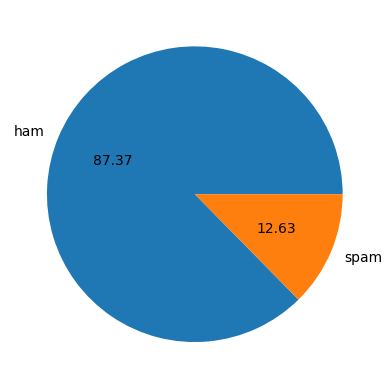

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [34]:
# Data is imbalanced


In [37]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jayrajsinh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
df['num_characters'] = df['text'].apply(len)

In [40]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [42]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
# ham
df[df['target'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
#spam
df[df['target'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [52]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

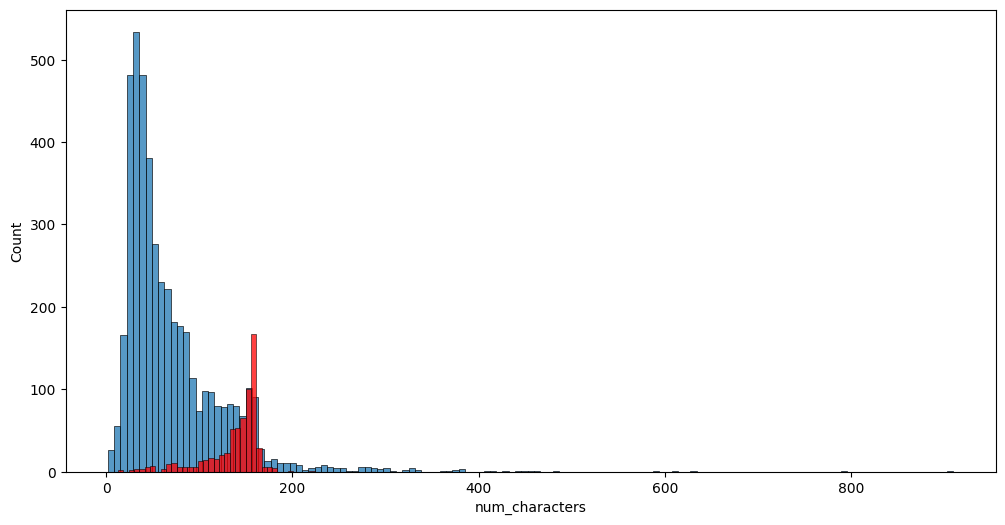

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_characters'])
sns.histplot(df[df['target'] == 'spam']['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

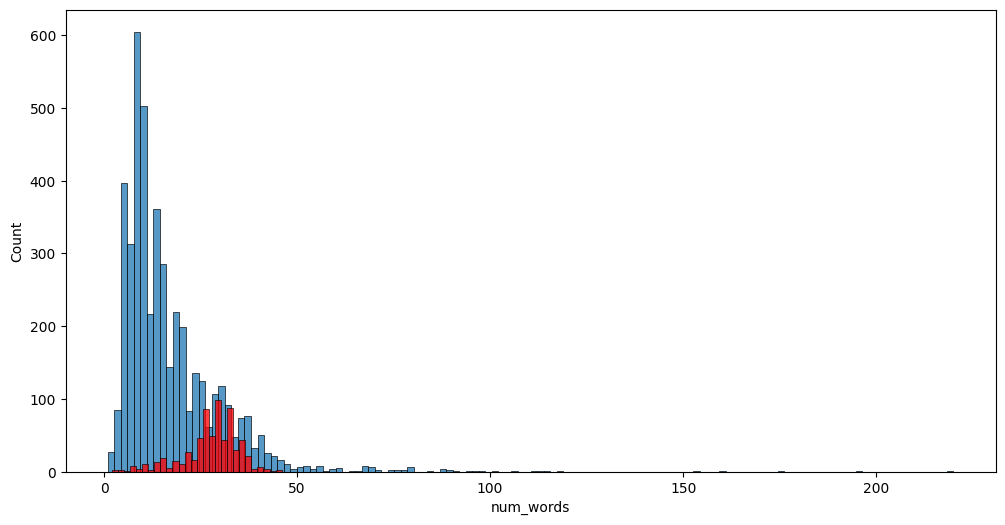

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_words'])
sns.histplot(df[df['target'] == 'spam']['num_words'],color='red')

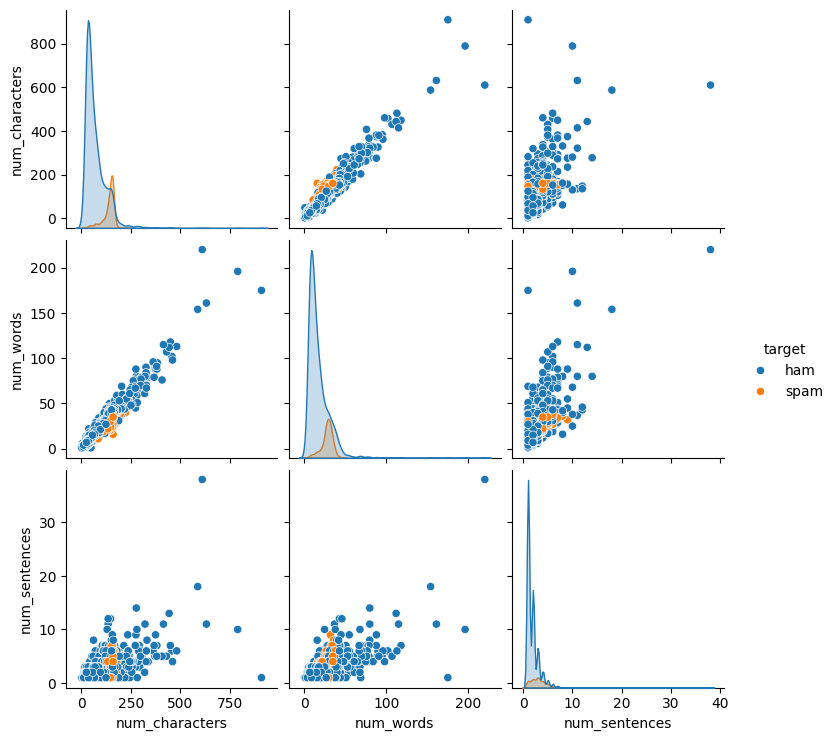

In [55]:
sns.pairplot(df,hue='target')

# 3.Data Preprocessing


In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text
  
    

In [7]:
df['text'][2000]

NameError: name 'df' is not defined

In [8]:
transform_text('Hi how are you')

NameError: name 'transform_text' is not defined

In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
df['text'][10]

NameError: name 'df' is not defined

In [5]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


# 4. Model Building

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn as sl

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [17]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

NameError: name 'df' is not defined

In [12]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [13]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [14]:
X.shape

(1, 1)

In [18]:
y = df['target'].values

NameError: name 'df' is not defined

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [3]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [26]:
X.shape

NameError: name 'X' is not defined

In [9]:
y = df['target'].values

NameError: name 'df' is not defined

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

NameError: name 'X' is not defined

In [12]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [13]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [14]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

NameError: name 'X_train' is not defined

In [15]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

NameError: name 'X_train' is not defined

In [16]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

NameError: name 'X_train' is not defined

In [17]:
# tfidf --> MNB

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [19]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

NameError: name 'XGBClassifier' is not defined

In [20]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

NameError: name 'xgb' is not defined

In [21]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [22]:
train_classifier(svc,X_train,y_train,X_test,y_test)

NameError: name 'X_train' is not defined

In [23]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

NameError: name 'clfs' is not defined

In [24]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Preci

SyntaxError: unterminated string literal (detected at line 1) (1423366798.py, line 1)

In [25]:
performance_df

NameError: name 'performance_df' is not defined

In [51]:
pip install seaborn



  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.6 kB 563.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 726.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 726.2 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.6 kB 573.4 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.6 kB 808.4 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/294.6 kB 774.0 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 758.2 kB/s eta 0:00:00


In [36]:
pip install nltk


     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB 297.7 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.5 MB 326.8 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.5 MB 326.8 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.5 MB 327.2 kB/s eta 0:00:05
     --- ------------------------------------ 0.1/1.5 MB 387.0 kB/s eta 0:00:04
     ----- ---------------------------------- 0.2/1.5 MB 478.0 kB/s eta 0:00:03
     ------ --------------------------------- 0.3/1.5 MB 541.3 kB/s eta 0:00:03
     -------- ------------------------------- 0.3/1.5 MB 655.4 kB/s eta 0:00:02
     ---------- ----------------------------- 0.4/1.5 MB 692.6 kB/s eta 0:00

In [32]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/2b/b3/70c33027c4918c10ccf176014b38f8b91cb18ac018a78854543a4fc72609/cycler-0.12.0-py3-none-any.whl.metadata
  Using cached cycler-0.12.0-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/55/a7/5936376afaeaca384c9604ac15311edd1a03a520b4f1eef31da2b42148f1/fonttools-4.43.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.0 kB ? eta -:--:--
     

In [9]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

NameError: name 'tfidf' is not defined